#                              CARTOONING AN IMAGE 

### Importing necessary library

In [1]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

### Reading the image

In [4]:
img_original = cv2.imread('cat .jpg')
img_resize = cv2.resize(img_original, (700, 600), interpolation=cv2.INTER_CUBIC)

In [5]:
for i in range(50):
    img_bilateral_filter = cv2.bilateralFilter(img_resize, 9, 9, 7)

### Simple way to Cartoonize an image without following any steps

In [6]:
img_gray = cv2.cvtColor(img_bilateral_filter, cv2.COLOR_BGR2GRAY)
img_median_blur = cv2.medianBlur(img_gray, 5)
img_adaptive_threshold = cv2.adaptiveThreshold(img_median_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
img_color = cv2.cvtColor(img_adaptive_threshold, cv2.COLOR_GRAY2BGR)
img_cartoon = cv2.bitwise_and(img_resize, img_color)

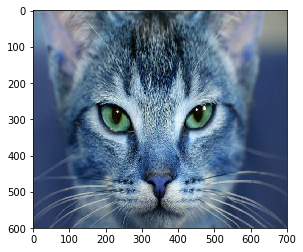

In [7]:
plt.imshow(img_resize)


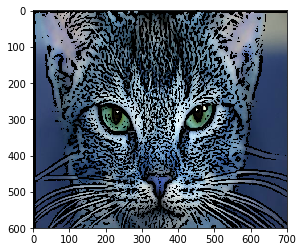

In [8]:
plt.imshow(img_cartoon)

## 6 STEPS TO CARTOONIZE AN IMAGE

### STEP 1: Downsampling image using Gaussian pyramid
### STEP 2: Converting to grayscale
### STEP 3: Applying median blur
### STEP 4: Detect and Enhance images
### STEP 5: Convert back to color so that it can be bit-ANDed with color image
### STEP 6: Cartoonizing

        

In [9]:
img_rgb = cv2.imread('cat.jpg')

In [10]:
class Cartoonizer:
   
    def __init__(self):
        pass
    def render(self, input_image):
        #img_rgb = cv2.resize(img_rgb, (600,206))
        numDownSamples = 1       # number of downscaling steps
        numBilateralFilters = 10  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = input_image
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        img_transform1 = img_color
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        img_transform2 = img_color
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        img_transform3 = img_color
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_transform4 = img_gray
        img_blur = cv2.medianBlur(img_gray, 3)
        img_transform5 = img_blur
        # -- STEP 4 --
        # detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 5, 2)
        
        # -- STEP 5 --
        # convert back to color so that it can be bit-ANDed with color image
        (x,y,z) = img_color.shape
        img_edge = cv2.resize(img_edge,(y,x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
        kernel = np.ones((1,1),np.uint8)
        img_edge = cv2.dilate(img_edge,kernel,iterations = 1)
        img_transform6 = img_edge
        return  cv2.bitwise_and(img_color, img_edge),img_transform1,img_transform2,img_transform3,img_transform4,img_transform5,img_transform6



### Visualizing 6 steps

In [11]:
tmp_canvas = Cartoonizer()
res,img_transform1,img_transform2,img_transform3,img_transform4,img_transform5,img_transform6 = tmp_canvas.render(img_rgb)
fig = plt.figure()
#fig.set_figheight(15)
fig.set_figwidth(23)
a = fig.add_subplot(2, 4, 1)
imgplot = plt.imshow(img_rgb)
plt.axis('off')
a.set_title('Original')
a = fig.add_subplot(2, 4, 2)
imgplot = plt.imshow(img_transform1)
plt.axis('off')
a.set_title('First Step')
a = fig.add_subplot(2, 4, 3)
imgplot = plt.imshow(img_transform2)
plt.axis('off')
a.set_title('Second Step')
a = fig.add_subplot(2, 4, 4)
imgplot = plt.imshow(img_transform3)
plt.axis('off')
a.set_title('Third Step')
a = fig.add_subplot(2, 4, 5)
imgplot = plt.imshow(img_transform4)
plt.axis('off')
a.set_title('Fourth Step')
a = fig.add_subplot(2, 4, 6)
imgplot = plt.imshow(img_transform5)
plt.axis('off')
a.set_title('Fifth Step')
a = fig.add_subplot(2, 4, 7)
imgplot = plt.imshow(img_transform6)
plt.axis('off')
a.set_title('Sixth Step')
a = fig.add_subplot(2, 4, 8)
imgplot = plt.imshow(res)
plt.axis('off')
a.set_title('Cartonized')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\pyramids.cpp:749: error: (-215:Assertion failed) !_src.empty() in function 'cv::pyrDown_'


## Reference:

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.90.6465&rep=rep1&type=pdf

https://www.researchgate.net/publication/327915404_Fast_and_Accurate_Gaussian_Pyramid_Construction_by_Extended_Box_Filtering

https://subscription.packtpub.com/book/application_development/9781785282690/1/ch01lvl1sec12/cartoonizing-an-image

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

https://www.tutorialspoint.com/opencv/opencv_median_blur.htm